<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/34_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_(SGD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제점: 데이터가 계속 추가된다..?

In [ ]:
# 실무에선 항상 train 데이터가 한번에 준비되어 제공되지 않는다
# 일정량씩 혹은 불규칙하게 준비된다

# 어떻게 할까?

In [ ]:
# 방법1
# 매일매일 새로이 추가된 데이터를 기존 데이터에 더하여 훈련하자

# 단점: 시간이 지날수록 데이터의 크기가 늘어난
# 한번훈련시키기 위한 HW, 시간 소요

In [ ]:
# 방법2
# 새로운 데이터 추가될때마다, 기존데이터 버리고 새로운 데이터로만 학습하기
# 데이터 크기는 일정량 유지는 되겠지만
# 단점: 버리는 데이터가 발생 -> 중요한 데이터 포함안될수도 -> 제대로 예측못함.

# 점진적 학습
Incremental Learning


In [ ]:
# 점진적 학습이란!

# 기존의 훈련한 모델을 '버리지 않고'  새로운 데이터에 대해서만 '조금씩 더 훈련' 하는 방법!

#  => 이전 훈련에 사용했던 데이터를 모두 유지할 필요 없다
#  => 이전에 학습앴던 내용을 까먹지도 않을거다.

# 대표적인 점진적 학습 알고리즘 : SGD (Stochastic Gradient Descent) 확률적 경사 하강법


# 확률적 경사 하강법
Stochastic Gradient Descent, SGD


In [ ]:
# Stochastic '확률적'  : '무작위하게', '랜덤하게' 의 표현
# Gradient   '경사'   : 언덕의 기울기
# Descent    '하강법'  : 경사를 따라 내려가는 방법

# 훈련세트 사용해서 내려가는 방향을 찾아야 하는데,  시작점은 '랜덤하게 시작' 된다. <- 확률적
# 훈련세트에서 '랜덤하게 하나 골라서 시작'  <- 확률적

# '내려가는 방향'으로 발걸음을 아주 '조금씩' 움직여야 한다

![](https://velog.velcdn.com/images/yellow372/post/97002cf9-1d40-45d0-994e-2e4e0fb790d2/image.png)


## epach 에포크

In [ ]:
# 랜덤하게 샘플에서 데이터 꺼내어 조금씩 내려온다
# 모든 훈련데이터를 다 사용하고 나서, 원하는 지점까지 내려오지 못했다면?
# 다시 모든 샘플을 처음부터 시작.

# 훈련세트를 한번 모두 사용하는 과정을 '에포크(epoch)' 라 한다


## Batch / Minibatch / Stochastic

![](https://blog.kakaocdn.net/dn/cwF02k/btrAqrDo3Gk/zcF7apclMmxkkbosDBpkkk/img.png)
![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DF384F5BABE05F27)
![](https://miro.medium.com/v2/resize:fit:908/1*bKSddSmLDaYszWllvQ3Z6A.png)


In [ ]:
"""
▶한번에 무작위로 '한개의 샘플'을 학습하여
'한걸음씩' 움직여 내겨가는 것을 확률적 경사 하강법 (Stochastic Gradient Descent) 라 하고
중간에 튀는 데이터가 있으면 학습의 방향(기울기)이 엉뚱한 곳으로 내려갈수도 있는 위험성이 있습니다.

▶무작위로 '몇 개의 샘플'을 선택하여 학습한뒤
한걸음씩 경사를 내려가는 방식을 미니배치 경사 하강법 (minibatch gradient descent) 라 합니다
 ↑ 실전에서 가장 많이 쓰이는 방식

▶극닥적으로 '전체 샘플'을 다 학습한뒤
'한걸음씩' 경사를 내려가는 방식을 배치 경사 하강법 (Batch Gradient Descent) 라 합니다.
전체 데이터를 학습한뒤 움직이는 것이기에 가장 안정적인 방법이다.
그러나! 한번 움직이는데 전체 데이터를 사용하면 그만큼 HW  자원을 많이 사용하게 되고, HW 용량에 따라
한번에 전체 데이터를 모두 읽어오기 힘들수도 있다.

"""
None


# 손실함수
loss function

학습한 모델이 예측한 값과 정답간의 '오차'를 측정하는 함수

얼마나 잘 맞추느냐 가 아니라 **얼마나 잘 못 맞추는지**에 대한 값.

따라서 손실함수 값은 작으면 **작을수록 좋은 것**이다.


In [ ]:
# 손실함수 (loss function)  : 샘플 하나에 대한 손실을 정의
# 비용함수 (cost function)  : 훈련세트에 있는 모든 샘플에 대한 손실함수값의 합
# ※ 그러나, 일반적으로 위 둘을 구분하지 않고 혼용하여 사용


## 분류 에서의 손실 (loss)

In [ ]:
# '분류' 에서의 손실(loss)  => 정답을 못맞히는 겁니다.
# 예측     정답(target)
#  1   =    1
#  0   ≠    1
#  0   =    0
#  1   ≠    0

# 4개의 예측중 2개만 맞힘 -> 정확도 0.5 -> 이것을 손실함수로 사용할 수 있나?

In [ ]:
# 정확도를 손실함수로 사용 못하는 이유!
#
# 4개의 샘플만 있다면 정확도는 0, 0.25, 0.5, 0.75, 1 <= 5가지뿐!
# 그러나! 경사하강법은 '아주 조금씩' 내려와야 한다.

# 정확도가 '연속적' 이지 않으면 '조금씩 내려오기' 힘들다!
# 왜냐하면 손실함수는 '미분가능' 한 연속함수 형태여야 하기 때문이다!

In [ ]:
# 분류문제에서 어떻게 연속적인 손실함수 만들수 있나?
# => Logistic regression 에서 확률값은 0.0 ~ 1.0 까지 연속적인 값!

## 로지스틱 손실 함수 (이진분류)
logistic loss function

aka. binary cross-entropy loss function


In [ ]:
# 가령 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8 이라고 가정해 보겠습니다.
# 첫번째 샘플로부터 하나씩 어떻게 손실함수를 만들 수 있는지 살펴보자

In [ ]:
"""
▷첫번째 샘플의 예측은 0.9 이므로 양성클래스의 target 인 1 과 곱한 다음 음수로 바꿀수 있습니다.
이 경우 예측이 1에 가까울수록 좋은 모델입니다.
예측이 1에 가까울수록 예측과 target 의 곱의 음수는 점점 작아집니다.
이 값을 손실 함수로 사용해도 괜찮을거다

    예측   정답(target)
    0.9    x    1        →   -0.9

▷두번째 샘플의 예측은 0.3 입니다.  target 인 양성 클래스(1) 인데 거리가 멀다.
위에서와 마찬가지로 예측 과 target 을 곱해 음수로 바꿔보죠

이 값은 -0.3 이 되기 때문에 확실히 첫 번째 샘플보다 높은 손실이 됩니다.

    예측   정답(target)
    0.9    x    1        →   -0.9
    0.3    x    1        →   -0.3


▷세 번째 샘플을 보죠.  이 샘플의 target 은 음성 클래스라 0 이군요.
이 값을 예측 확률인 0.2 와 그대로 곱해서는 곤란합니다.
무조건 0이 될 테니까요.  한가지 방법은 target 을 마치 양성클래스처럼 바꾸어
1로 만드는 거죠.  대신 예측값도 양성 클래스에 대한 예측으로 바꿉니다.
즉, 1 - 0.2 = 0.8 로 사용합니다.
그 다음 곱하고 음수로 바꾸는 것은 위와 동일합니다

          예측   정답(target)
          0.9    x    1        →   -0.9
          0.3    x    1        →   -0.3
    0.2 → 0.8    x    1        →   -0.8

어떤가요?  세번째 샘플은 음성 클래스인 target 을 맞추었으므로 손실이 낮아야 합니다.
-0.8 은 꽤 낮은 손실입니다.

▷이제 네 번째 샘플을 보죠.  네번째 샘플도 target 은 음성클래스 입니다.
하지만, 정답을 맞히지 못했네요. target 을 1로 바꾸고 예측확률을 1에서 뺀 다음
곱해서 음수로 바꿔 봅시다.

          예측   정답(target)
          0.9    x    1        →   -0.9  낮은 손실
          0.3    x    1        →   -0.3  높은 손실
    0.2 → 0.8    x    1        →   -0.8  낮은 손실
    0.8 → 0.2    x    1        →   -0.2  높은 손실

네번째 샘플의 손실이 높군요.  예측 확률을 사용해 이런 방식으로 손실값 계산하면
연속적인 손실 함수를 얻을 수 있을것 같습니다.

여기에서 예측확률에 로그 함수를 적용하면 더 좋습니다.
예측확률의 범위는 0 ~ 1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실값은 양수가 됩니다.

손실이 양수가 되면 이해하기 더 쉽습니다.  또 로그함수는 0에 가까울수록 아주 큰 음수가 되기 때문에
손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있습니다.


"""
None

In [ ]:
# 양성클래스 (target = 1) 일때 손실은 -log(예측확률) 로 계산.
#      확률이 1에서 멀어질수록 손실이 아주 큰 양수가 됩니다.

# 음성클래스 (target = 0) 일때 손실은 -log(1 - 예측확률) 로 계산.
#      이 예측 확률이 0에서 멀어질수록 손실이 아주 큰 양수가 됩니다


In [ ]:
# 이러한 손실함수를 로지스틱 손실 함수 (logistic loss function)  또는
# 이진 크로스 엔트로피 손실함수 (binary cross-entropy loss function) 이라고도 부릅니다.


## 크로스엔트로피 손실함수 (다중분류)
cross-entropy loss function

다중분류 문제 에서의 손실함수


In [ ]:
# 손실함수를 우리가 직접 만드는 일은 거의 없습니다.
# 이미 손실함수들은 정의되어 제공되기 때문입니다.

# ★
# 이진분류는 --> '로지스틱 손실함수' 사용 하고
# 다중분류는 --> '크로스엔트로피 손실함수' 사용 합니다


## 참고: 회귀문제에서의 손실함수: MSE, MAE

In [ ]:
"""
'회귀' 는 어떤 손실함수를 사용하나

회귀 문제의 경우  '평균 절대값 오차(Mean absolute error, MAE)' 를 사용할수 있습니다.
target 에서 예측을 뺀 절대값을 모든 샘플에 평균한 값.

혹은 '평균 제곱 오차 (mean squared error, MSE)' 를 많이 사용함.
target 에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 대한 평균한 값.  <- 이 값이 작을수록 좋은 모델!
"""
None


# SGDClassifier

## 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
# 입력 데이터 만들기
fish_input = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
# target 데이터 만들기
fish_target = fish_df['Species'].to_numpy()
fish_target
# target 값이 문자열이다?

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:
# 입력 데이터 와 타켓데이터 만들기
fish_input = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish_df['Species'].to_numpy()

In [ ]:
# 훈련 / 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)


In [ ]:
# 전처리 (표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모델학습

In [ ]:
from sklearn.linear_model import SGDClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
```python
class sklearn.linear_model.SGDClassifier(
  loss='hinge',  # 손실함수 종류
  *,
  penalty='l2',
  alpha=0.0001,
  l1_ratio=0.15,
  fit_intercept=True,
  max_iter=1000,  # 수행할 epoch 횟수
  tol=0.001,
  shuffle=True,
  verbose=0,
  epsilon=0.1,
  n_jobs=None,
  random_state=None,
  learning_rate='optimal',
  eta0=0.0,
  power_t=0.5,
  early_stopping=False,
  validation_fraction=0.1,
  n_iter_no_change=5,
  class_weight=None,
  warm_start=False,
  average=False)
```


In [ ]:
# SGDClassifier 객체를 만들 때 2개의 매개변수를 지정
#  loss=  손실함수 종류   'log_loss' - 로지스틱 손실함수
#  max_iter=  수행할 epoch 횟수.


In [ ]:
sc = SGDClassifier(loss='log_loss', #로지스틱 손실 함수
                   max_iter=10, #최대 epoch 횟수
                   random_state=42 # 랜덤 시드
                   )
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [ ]:
# 확률적 경사 하강법은 '점진적 학습' 가능
# 모델을 다시 만들지 않고도,  이미 훈련된 모델에 추가로 훈련이 가능하다

# 사이킷럿에서 모델을 추가로 이어서 훈련 => partial_fit() 사용
#  fit() 과 사용법은 같으나, 호출할때마다 1 epoch 씩 이어서 훈련한다

In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [ ]:
# 앞으로 얼마나 더(epoch) 훈련해야 할까요? 어떤 기준이 필요할까?

In [ ]:
# 비록 학습에 모든 훈련세트 데이터를 전달했지만,
# SGDClassifier 는 전달받은 훈련세트에서 '1개씩' 샘플을 꺼애어 경사 하강법 수행.
# SGDClassifier 는 '미니배치 / 배치 경사하강법' 제공 안함

# 에포크의 overfit / underfit

In [ ]:
# '너무 적은 에포크 ' -> 훈련세트 와 테스트세트에 모두 잘 맞지 않는 underfit 가능성 높다
# '너무 많은 에포크 ' -> 훈련세트에 너무 잘맞고 테스트세트에는 오히려 점수 나쁜 overfit 가능성 높다

![](https://blog.kakaocdn.net/dn/cWFqiQ/btq3TV10Byf/pfkDAkie498C6HTfrofv3K/img.png)


In [ ]:
# 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작합니다.
# 바로 이 지점이 모델이 과대 적합되기 시작하는 곳입니다.
# 과대 적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료 (early stopping) 이라 합니다.

In [ ]:
sc = SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 300번의 에포크 수행 -> 훈련세트와 테스트세트 점수 기록

train_score = []
test_score = []


In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

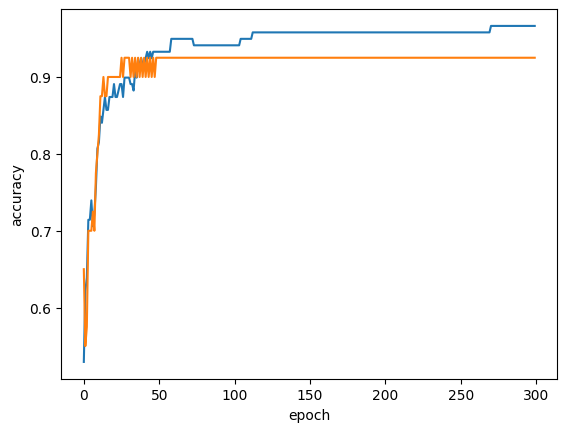

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
"""
데이터가 작기 때문에 아주 잘 드러나지는 않지만.
백번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있습니다.
또, 확실히 에포크 초기에는 과소 적합되어 훈련 세트와 테스트 세트의 점수가 낮습니다.
이 모델의 경우 100번째 에포크가 적절한 반복 횟수로 보입니다.
"""
None

In [ ]:
# 기본적으로 SGDClassifier는 일정 epoch 동안 tol= 값만큼 항상되지 않으면 자동으로 멈춤
# tol=None으로 두어 max_iter=100 만큼 반복 학습
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# loss = 'hinge' (기본값) <- SVM을 위한 손실함수
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
